<h2>Importing modules required for running the code</h2>

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


2022-05-08 14:30:18.716336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 14:30:18.716362: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<h2>Columns Name for our testing and training data </h2>

In [6]:
features = ['frame.encap_type',
 'frame.len',
 'frame.number',
 'frame.time',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_epoch',
 'frame.time_relative',
 'radiotap.channel.flags.cck',
 'radiotap.channel.flags.ofdm',
 'radiotap.channel.freq',
 'radiotap.datarate',
 'radiotap.dbm_antsignal',
 'radiotap.length',
 'radiotap.mactime',
 'radiotap.present.tsft',
 'radiotap.rxflags',
 'radiotap.timestamp.ts',
 'radiotap.vendor_oui',
 'wlan.duration',
 'wlan.analysis.kck',
 'wlan.analysis.kek',
 'wlan.bssid',
 'wlan.country_info.fnm',
 'wlan.country_info.code',
 'wlan.da',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.order',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.pwrmgt',
 'wlan.fc.type',
 'wlan.fc.retry',
 'wlan.fc.subtype',
 'wlan.fcs.bad_checksum',
 'wlan.fixed.beacon',
 'wlan.fixed.capabilities.ess',
 'wlan.fixed.capabilities.ibss',
 'wlan.fixed.reason_code',
 'wlan.fixed.timestamp',
 'wlan.ra',
 'wlan_radio.duration',
 'wlan.rsn.ie.gtk.key',
 'wlan.rsn.ie.igtk.key',
 'wlan.rsn.ie.pmkid',
 'wlan.sa',
 'wlan.seq',
 'wlan.ssid',
 'wlan.ta',
 'wlan.tag',
 'wlan.tag.length',
 'wlan_radio.channel',
 'wlan_radio.data_rate',
 'wlan_radio.end_tsf',
 'wlan_radio.frequency',
 'wlan_radio.signal_dbm',
 'wlan_radio.start_tsf',
 'wlan_radio.phy',
 'wlan_radio.timestamp',
 'wlan.rsn.capabilities.mfpc',
 'wlan_rsna_eapol.keydes.msgnr',
 'wlan_rsna_eapol.keydes.data',
 'wlan_rsna_eapol.keydes.data_len',
 'wlan_rsna_eapol.keydes.key_info.key_mic',
 'wlan_rsna_eapol.keydes.nonce',
 'eapol.keydes.key_len',
 'eapol.keydes.replay_counter',
 'eapol.len',
 'eapol.type',
 'llc',
 'arp',
 'arp.hw.type',
 'arp.proto.type',
 'arp.hw.size',
 'arp.proto.size',
 'arp.opcode',
 'arp.src.hw_mac',
 'arp.src.proto_ipv4',
 'arp.dst.hw_mac',
 'arp.dst.proto_ipv4',
 'ip.dst',
 'ip.proto',
 'ip.src',
 'ip.ttl',
 'ip.version',
 'data.data',
 'data.len',
 'icmpv6.mldr.nb_mcast_records',
 'icmpv6.ni.nonce',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.analysis',
 'tcp.analysis.flags',
 'tcp.analysis.retransmission',
 'tcp.analysis.reused_ports',
 'tcp.analysis.rto_frame',
 'tcp.checksum',
 'tcp.checksum.status',
 'tcp.dstport',
 'tcp.flags.syn',
 'tcp.flags.ack',
 'tcp.flags.fin',
 'tcp.flags.push',
 'tcp.flags.reset',
 'tcp.option_len',
 'tcp.payload',
 'tcp.seq',
 'tcp.seq_raw',
 'tcp.srcport',
 'tcp.time_delta',
 'tcp.time_relative',
 'udp.dstport',
 'udp.srcport',
 'udp.length',
 'udp.time_relative',
 'udp.time_delta',
 'nbns',
 'nbss.continuation_data',
 'nbss.type',
 'nbss.length',
 'ldap',
 'smb.access.generic_execute',
 'smb.access.generic_read',
 'smb.access.generic_write',
 'smb.flags.notify',
 'smb.flags.response',
 'smb.flags2.nt_error',
 'smb.flags2.sec_sig',
 'smb.mid',
 'smb.nt_status',
 'smb.server_component',
 'smb.pid.high',
 'smb.tid',
 'smb2.acct',
 'smb2.auth_frame',
 'smb2.buffer_code',
 'smb2.cmd',
 'smb2.data_offset',
 'smb2.domain',
 'smb2.fid',
 'smb2.filename',
 'smb2.header_len',
 'smb2.host',
 'smb2.msg_id',
 'smb2.pid',
 'smb2.previous_sesid',
 'smb2.protocol_id',
 'smb2.sesid',
 'smb2.session_flags',
 'smb2.tid',
 'smb2.write_length',
 'dhcp',
 'dhcp.client_id.duid_ll_hw_type',
 'dhcp.cookie',
 'dhcp.hw.addr_padding',
 'dhcp.hw.mac_addr',
 'dhcp.id',
 'dhcp.ip.client',
 'dhcp.ip.relay',
 'dhcp.ip.server',
 'dhcp.option.broadcast_address',
 'dhcp.option.dhcp_server_id',
 'dhcp.option.router',
 'dhcp.option.vendor.bsdp.message_type',
 'mdns',
 'dns',
 'dns.a',
 'dns.count.add_rr',
 'dns.count.answers',
 'dns.count.auth_rr',
 'dns.count.labels',
 'dns.count.queries',
 'dns.flags.authoritative',
 'dns.flags.checkdisable',
 'dns.flags.opcode',
 'dns.flags.response',
 'dns.id',
 'dns.ptr.domain_name',
 'dns.qry.name',
 'dns.qry.name.len',
 'dns.resp.len',
 'dns.resp.name',
 'dns.resp.ttl',
 'dns.retransmit_request',
 'dns.retransmit_response',
 'dns.time',
 'ssdp',
 'http.connection',
 'http.content_length',
 'http.content_type',
 'http.date',
 'http.file_data',
 'http.host',
 'http.last_modified',
 'http.location',
 'http.next_request_in',
 'http.next_response_in',
 'http.request.full_uri',
 'http.request.line',
 'http.request.method',
 'http.request.uri.path',
 'http.request.uri.query',
 'http.request.uri.query.parameter',
 'http.request.version',
 'http.request_in',
 'http.response.code',
 'http.response.code.desc',
 'http.response.line',
 'http.response.phrase',
 'http.response.version',
 'http.response_for.uri',
 'http.response_in',
 'http.referer',
 'http.time',
 'http.server',
 'json.value.string',
 'json.key',
 'ssh.cookie',
 'ssh.compression_algorithms_client_to_server_length',
 'ssh.compression_algorithms_server_to_client_length',
 'ssh.direction',
 'ssh.dh_gex.max',
 'ssh.dh_gex.min',
 'ssh.dh_gex.nbits',
 'ssh.encryption_algorithms_client_to_server_length',
 'ssh.encryption_algorithms_server_to_client_length',
 'ssh.host_key.length',
 'ssh.host_key.type_length',
 'ssh.kex_algorithms_length',
 'ssh.mac_algorithms_client_to_server_length',
 'ssh.mac_algorithms_server_to_client_length',
 'ssh.message_code',
 'ssh.mpint_length',
 'ssh.packet_length',
 'ssh.packet_length_encrypted',
 'ssh.padding_length',
 'ssh.padding_string',
 'ssh.protocol',
 'ssh.server_host_key_algorithms_length',
 'tls.alert_message.desc',
 'tls.alert_message.level',
 'tls.compress_certificate.compressed_certificate_message.length',
 'tls.handshake.extension.type',
 'tls.handshake.extensions_key_share_group',
 'tls.handshake.session_ticket_length',
 'tls.handshake.version',
 'tls.record.content_type',
 'tls.record.version']

<h2> Training Dataset </h2>

In [5]:
data = pd.read_csv("merged_full.csv", low_memory=False)

In [7]:
data['Label'].value_counts()

Normal          4517300
Beacon Flood    2667248
Deauth           752070
RogueAP           50258
Krack             16009
Evil_Twin         10017
Name: Label, dtype: int64

In [8]:
data.columns

Index(['Unnamed: 0', 'frame.encap_type', 'frame.len', 'frame.number',
       'frame.time', 'frame.time_delta', 'frame.time_delta_displayed',
       'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck',
       ...
       'tls.alert_message.desc', 'tls.alert_message.level',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=251)

In [9]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

<h2> Data Exploration</h2>

In [10]:
data.head()

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,...,tls.alert_message.desc,tls.alert_message.level,tls.compress_certificate.compressed_certificate_message.length,tls.handshake.extension.type,tls.handshake.extensions_key_share_group,tls.handshake.session_ticket_length,tls.handshake.version,tls.record.content_type,tls.record.version,Label
0,23,400,1,"Apr 11, 2022 07:40:59.212348809 IST",0.000000,0.000000,1.649643e+09,0.000000,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
1,23,400,2,"Apr 11, 2022 07:40:59.314681063 IST",0.102332,0.102332,1.649643e+09,0.102332,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
2,23,400,3,"Apr 11, 2022 07:40:59.417147425 IST",0.102466,0.102466,1.649643e+09,0.204799,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
3,23,400,4,"Apr 11, 2022 07:40:59.519536327 IST",0.102389,0.102389,1.649643e+09,0.307188,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
4,23,400,5,"Apr 11, 2022 07:40:59.621927854 IST",0.102392,0.102392,1.649643e+09,0.409579,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal


In [11]:
data.describe()

,frame.encap_type,frame.len,frame.number,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,...,ssh.mpint_length,ssh.packet_length,ssh.packet_length_encrypted,ssh.padding_length,ssh.padding_string,ssh.protocol,ssh.server_host_key_algorithms_length,tls.alert_message.desc,tls.alert_message.level,tls.compress_certificate.compressed_certificate_message.length
count,8012902.0,8.012902e+06,8.012902e+06,8.012902e+06,8.012902e+06,8.012902e+06,8.012902e+06,8.012902e+06,8.012902e+06,8.012902e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,10.000000,1.0
mean,23.0,4.957776e+02,9.977895e+05,9.753703e-03,9.753703e-03,1.648966e+09,8.088158e+03,5.667672e-01,1.423543e-01,2.453811e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.800000,1.300000,1496.0
std,0.0,5.701087e+02,6.014911e+05,1.728864e-02,1.728864e-02,5.670425e+06,1.081047e+04,4.955221e-01,3.494132e-01,3.064999e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.220111,0.483046,NaN
min,23.0,4.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.607630e+09,0.000000e+00,0.000000e+00,0.000000e+00,2.412000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1496.0
25%,23.0,5.800000e+01,4.837262e+05,8.573400e-05,8.573400e-05,1.649644e+09,6.107860e+02,0.000000e+00,0.000000e+00,2.417000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1496.0
50%,23.0,1.300000e+02,9.845330e+05,7.061130e-04,7.061130e-04,1.649644e+09,1.267982e+03,1.000000e+00,0.000000e+00,2.417000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1496.0
75%,23.0,1.372000e+03,1.472839e+06,1.626991e-02,1.626991e-02,1.649882e+09,1.465721e+04,1.000000e+00,0.000000e+00,2.422000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.500000,1.750000,1496.0
max,23.0,3.156000e+03,2.250000e+06,4.024584e+00,4.024584e+00,1.649903e+09,3.590965e+04,1.000000e+00,1.000000e+00,5.180000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,2.000000,1496.0


In [12]:
data['Label'].value_counts()

Normal          4517300
Beacon Flood    2667248
Deauth           752070
RogueAP           50258
Krack             16009
Evil_Twin         10017
Name: Label, dtype: int64

In [13]:
data.isna().sum()

frame.encap_type                             0
frame.len                                    0
frame.number                                 0
frame.time                                   0
frame.time_delta                             0
                                        ...   
tls.handshake.session_ticket_length    8012860
tls.handshake.version                  8012677
tls.record.content_type                8010520
tls.record.version                     8009821
Label                                        0
Length: 250, dtype: int64

import sklearn.metrics as metrics<h2> Dropping columns with 50% of null data</h2>

In [14]:
data.replace({"?":None}, inplace=True)
null_column=data.columns[data.isnull().mean() >= 0.90]
null_column.shape

(201,)

In [15]:
len(data.columns)

250

<h2>Dropping all the null rows</h2>

In [16]:
data.drop(null_column, axis=1, inplace=True)
# data.dropna(inplace=True)

In [17]:
data.isna().sum()

frame.encap_type                      0
frame.len                             0
frame.number                          0
frame.time                            0
frame.time_delta                      0
frame.time_delta_displayed            0
frame.time_epoch                      0
frame.time_relative                   0
radiotap.channel.flags.cck            0
radiotap.channel.flags.ofdm           0
radiotap.channel.freq                 0
radiotap.datarate                919990
radiotap.dbm_antsignal                0
radiotap.length                       0
radiotap.present.tsft                 0
radiotap.rxflags                      0
wlan.duration                        48
wlan.bssid                      1347603
wlan.da                         1347694
wlan.fc.ds                            0
wlan.fc.frag                          0
wlan.fc.order                         0
wlan.fc.moredata                      0
wlan.fc.protected                     0
wlan.fc.pwrmgt                        0


In [18]:
data['Label'].value_counts()

Normal          4517300
Beacon Flood    2667248
Deauth           752070
RogueAP           50258
Krack             16009
Evil_Twin         10017
Name: Label, dtype: int64

<h2>Converting all the Columns to numeric</h2>

In [19]:
for col in data.columns:
    data[col]=pd.to_numeric(data[col], errors='ignore')

In [20]:
data.select_dtypes(['number']).head()

,frame.encap_type,frame.len,frame.number,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,...,wlan.fixed.capabilities.ibss,wlan.fixed.timestamp,wlan_radio.duration,wlan.seq,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.phy,wlan.rsn.capabilities.mfpc
0,23,400,1,0.000000,0.000000,1.649643e+09,0.000000,1,0,2417,...,0.0,726835626.0,3152.0,3204.0,2,1.0,2417,-15,4,1.0
1,23,400,2,0.102332,0.102332,1.649643e+09,0.102332,1,0,2417,...,0.0,726938010.0,3152.0,3205.0,2,1.0,2417,-12,4,1.0
2,23,400,3,0.102466,0.102466,1.649643e+09,0.204799,1,0,2417,...,0.0,727040422.0,3152.0,3206.0,2,1.0,2417,-13,4,1.0
3,23,400,4,0.102389,0.102389,1.649643e+09,0.307188,1,0,2417,...,0.0,727142806.0,3152.0,3207.0,2,1.0,2417,-15,4,1.0
4,23,400,5,0.102392,0.102392,1.649643e+09,0.409579,1,0,2417,...,0.0,727245199.0,3152.0,3208.0,2,1.0,2417,-11,4,1.0


In [21]:
import numpy as np
data = data.replace(np.nan, 0)

<h2>Splitting the training data</h2>

In [22]:
from sklearn.model_selection import train_test_split
# X_train, y_train = data.select_dtypes(['number']), data['Label']
X_train, X_test, y_train, y_test = train_test_split(data.select_dtypes(['number']), data['Label'], test_size=0.33, random_state=42)

In [23]:
y_train.value_counts()

Normal          3026993
Beacon Flood    1786316
Deauth           504236
RogueAP           33573
Krack             10686
Evil_Twin          6840
Name: Label, dtype: int64

<h2>Removing all the Constant of training data</h2>

In [24]:
zero_mean=X_train.columns[X_train.mean() <= 1]
X_train.drop(zero_mean, axis=1, inplace=True, errors='ignore')
X_train.shape

(5368644, 18)

In [25]:
X_train.describe()

,frame.encap_type,frame.len,frame.number,frame.time_epoch,frame.time_relative,radiotap.channel.freq,radiotap.datarate,radiotap.length,wlan.duration,wlan.fc.subtype,wlan.fixed.beacon,wlan.fixed.timestamp,wlan_radio.duration,wlan.seq,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.frequency,wlan_radio.phy
count,5368644.0,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06,5.368644e+06
mean,23.0,4.957799e+02,9.980187e+05,1.648965e+09,8.089134e+03,2.453941e+03,2.765308e+01,3.541227e+01,9.663681e+01,8.739078e+00,4.291141e+01,1.888370e+09,7.224631e+02,1.699281e+03,2.891456e+00,4.571994e+01,2.453941e+03,5.271369e+00
std,0.0,5.701175e+02,6.015719e+05,5.675234e+06,1.081263e+04,3.070752e+02,5.022156e+01,8.577670e+00,2.303160e+02,1.639608e+00,4.940999e+01,8.644606e+09,9.165446e+02,1.323008e+03,3.825618e+00,6.381358e+01,3.070752e+02,1.543835e+00
min,23.0,4.000000e+01,1.000000e+00,1.607630e+09,0.000000e+00,2.412000e+03,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.412000e+03,4.000000e+00
25%,23.0,5.800000e+01,4.838988e+05,1.649644e+09,6.107429e+02,2.417000e+03,1.000000e+00,3.000000e+01,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,6.400000e+01,3.960000e+02,2.000000e+00,1.000000e+00,2.417000e+03,4.000000e+00
50%,23.0,1.300000e+02,9.848520e+05,1.649644e+09,1.267893e+03,2.417000e+03,1.000000e+00,3.000000e+01,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,4.000000e+02,1.624000e+03,2.000000e+00,1.000000e+00,2.417000e+03,4.000000e+00
75%,23.0,1.372000e+03,1.473154e+06,1.649882e+09,1.466553e+04,2.422000e+03,2.400000e+01,4.400000e+01,2.200000e+02,9.000000e+00,1.000000e+02,0.000000e+00,9.920000e+02,2.862000e+03,3.000000e+00,1.300000e+02,2.422000e+03,7.000000e+00
max,23.0,3.156000e+03,2.249999e+06,1.649903e+09,3.590965e+04,5.180000e+03,1.444440e+02,6.400000e+01,3.000000e+04,1.400000e+01,1.000000e+02,2.615290e+12,1.262400e+04,4.095000e+03,3.600000e+01,1.733330e+02,5.180000e+03,8.000000e+00


<h2>Cleaning testing data</h2>

In [27]:
# data_test.isna().sum()
# data_test.replace({"?":None}, inplace=True)
# test_null_column=data_test.columns[data_test.isnull().mean() >= 0.5]
# data_test.drop(test_null_column, axis=1, inplace=True)
# data_test.dropna(inplace=True)
# for i in data_test.columns:
#     if i not in data.columns:
#         print(i)
#         data_test.drop([i], axis=1, inplace=True)

# for col in data_test.columns:
#     data_test[col]=pd.to_numeric(data_test[col], errors='ignore')


# X_test, y_test = data_test.select_dtypes(['number']), data_test['Label']

zero_mean=X_test.columns[X_test.mean() <= 1]
X_test.drop(zero_mean, axis=1, inplace=True, errors='ignore')

In [28]:
# for i in X_test.columns:
#     if i not in X_train.columns:
#         print(i)
#         X_test.drop([i], axis=1, inplace=True)

# for i in X_train.columns:
#     if i not in X_test.columns:
#         print(i)
#         X_train.drop([i], axis=1, inplace=True)

print(X_test.shape)
print(X_train.shape)

(2644258, 18)
(5368644, 18)


In [29]:
X_test.describe()

,frame.encap_type,frame.len,frame.number,frame.time_epoch,frame.time_relative,radiotap.channel.freq,radiotap.datarate,radiotap.length,wlan.duration,wlan.fc.subtype,wlan.fixed.beacon,wlan.fixed.timestamp,wlan_radio.duration,wlan.seq,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.frequency,wlan_radio.phy
count,2644258.0,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06,2.644258e+06
mean,23.0,4.957730e+02,9.973241e+05,1.648969e+09,8.086177e+03,2.453547e+03,2.762093e+01,3.541081e+01,9.668749e+01,8.737708e+00,4.295563e+01,1.894061e+09,7.229073e+02,1.701071e+03,2.887260e+00,4.571785e+01,2.453547e+03,5.270988e+00
std,0.0,5.700910e+02,6.013269e+05,5.660649e+06,1.080607e+04,3.053284e+02,5.020559e+01,8.577167e+00,2.311614e+02,1.638799e+00,4.941556e+01,9.308466e+09,9.166267e+02,1.323497e+03,3.805200e+00,6.382434e+01,3.053284e+02,1.544185e+00
min,23.0,4.000000e+01,1.000000e+00,1.607630e+09,0.000000e+00,2.412000e+03,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.412000e+03,4.000000e+00
25%,23.0,5.800000e+01,4.833662e+05,1.649644e+09,6.108736e+02,2.417000e+03,1.000000e+00,3.000000e+01,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,6.400000e+01,3.970000e+02,2.000000e+00,1.000000e+00,2.417000e+03,4.000000e+00
50%,23.0,1.300000e+02,9.838715e+05,1.649644e+09,1.268154e+03,2.417000e+03,1.000000e+00,3.000000e+01,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,4.000000e+02,1.627000e+03,2.000000e+00,1.000000e+00,2.417000e+03,4.000000e+00
75%,23.0,1.372000e+03,1.472181e+06,1.649882e+09,1.463817e+04,2.422000e+03,2.400000e+01,4.400000e+01,2.200000e+02,9.000000e+00,1.000000e+02,0.000000e+00,9.920000e+02,2.863000e+03,3.000000e+00,1.300000e+02,2.422000e+03,7.000000e+00
max,23.0,3.156000e+03,2.250000e+06,1.649903e+09,3.590963e+04,5.180000e+03,1.444440e+02,6.400000e+01,3.000000e+04,1.400000e+01,1.000000e+02,2.615290e+12,1.262400e+04,4.095000e+03,3.600000e+01,1.733330e+02,5.180000e+03,8.000000e+00


In [30]:
y_test.value_counts()

Normal          1490307
Beacon Flood     880932
Deauth           247834
RogueAP           16685
Krack              5323
Evil_Twin          3177
Name: Label, dtype: int64

<h2>Preprocessing  </h2> 

In [31]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_train=sc.transform(X_train)

sc1=StandardScaler()
sc1.fit(X_test)
scaled_X_test=sc1.transform(X_test)

In [32]:

print(list(X_train.columns))

['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.freq', 'radiotap.datarate', 'radiotap.length', 'wlan.duration', 'wlan.fc.subtype', 'wlan.fixed.beacon', 'wlan.fixed.timestamp', 'wlan_radio.duration', 'wlan.seq', 'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.phy']


In [33]:
print(scaled_X_train)
print(scaled_X_train.dtype)


[[ 0.         -0.76787656  0.51664532 ... -0.34036561 -0.12029873
   0.47196157]
 [ 0.         -0.799449    1.88130695 ... -0.70079051 -0.12029873
  -0.8235141 ]
 [ 0.         -0.1680002  -0.51747722 ... -0.70079051 -0.10401607
  -0.8235141 ]
 ...
 [ 0.         -0.6415868  -1.39656425 ... -0.70079051 -0.10401607
  -0.8235141 ]
 [ 0.         -0.6415868  -0.50020746 ... -0.70079051 -0.10401607
  -0.8235141 ]
 [ 0.         -0.65211095 -1.41314415 ... -0.70079051 -0.10401607
  -0.8235141 ]]
float64


<h2>Encoding the label data</h2>

In [34]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [35]:
encoder.classes_

array(['Beacon Flood', 'Deauth', 'Evil_Twin', 'Krack', 'Normal',
       'RogueAP'], dtype=object)

In [36]:
encoded_y

array([4, 4, 4, ..., 0, 0, 0])

<h2>Classification Machine Learning Algorithm </h2>

In [44]:
# from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def model_accuracy(model):
    y_preds=model.predict(X_test)
    matrix = metrics.confusion_matrix(y_test, y_preds, labels=model.classes_)
    ConfusionMatrixDisplay.from_predictions(y_test, y_preds, display_labels=model.classes_, xticks_rotation='vertical')
    # disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_, xticks_rotation='vertical')
    # disp.plot()
    print(matrix)
    return accuracy_score(y_test, y_preds)

In [ ]:
#Doesnot perform well for multiclass classification Problem 
lr=LogisticRegression()
lr.fit(X_train, y_train)
acc = model_accuracy(lr)
plt.savefig('lr_cm_new.eps')
plt.show()
print(acc)

<h2>Some of the Best Algorithm for Classification Problem </h2>

[[ 880932       0       0       0       0       0]
 [      0  247834       0       0       0       0]
 [      0       0    3176       0       1       0]
 [      0       0       0    5323       0       0]
 [      0       4       3       1 1490299       0]
 [      0       0       0       0       0   16685]]


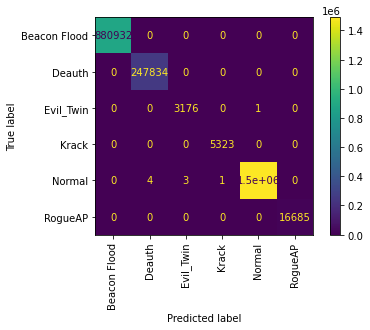

0.9999965963986873


In [45]:
# Decision Tree Algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
acc = model_accuracy(dtree)
plt.savefig('dtree_cm_new.eps')
plt.show()
print(acc)

In [46]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions()

TypeError: from_predictions() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
from sklearn import tree
# tree.plot_tree(dtree)
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=list(X_train.columns), class_names=encoder.classes_, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

[[ 880932       0       0       0       0       0]
 [      0  247834       0       0       0       0]
 [      0       0    3175       0       2       0]
 [      0       0       0    5323       0       0]
 [      0       8       0       0 1490299       0]
 [      0       0       0       0       0   16685]]


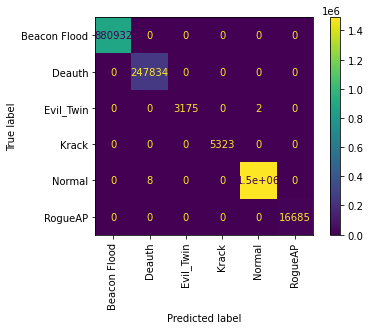

0.9999962182207637


In [48]:
#Random Forest Classifier 
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
acc = model_accuracy(forest)
plt.savefig('rf_cm_new.eps')
plt.show()
print(acc)

In [ ]:
import joblib
joblib.dump(forest, "ids_rf.joblib")

In [ ]:
import matplotlib.pyplot as plt
data = {'Logistic Regression': 0.7239393774784073, 'Decision Tree': 0.9868904702410053, 'Random Forest': 0.9998551433175802}
# fig = plt.figure(figsize = (10, 5))
plt.bar(list(data.keys()), list(data.values()), width=0.4)
plt.xlabel('ML Classifiers')
plt.ylabel('Accuracy')
plt.savefig('accuracy.eps')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix


<h2>Finding the True Positive, False Positive Rate for the Labels </h2>

In [ ]:
# when we are training the model with the labels outcomes of 'normal'
y_train_norm=(y_train == 'Normal')

y_test_norm =(y_test =='Normal')

In [ ]:
forest.fit(X_train,y_train_norm)

In [ ]:
y_cross_acc=cross_val_score(forest,X_train, y_train_norm, cv=10, scoring="accuracy")

In [ ]:
y_cross_acc

In [ ]:
y_preds_norm = cross_val_predict(forest, X_train,y_train_norm, cv=10)

In [ ]:
y_preds_norm

In [ ]:
confusion_matrix(y_train_norm, y_preds_norm)

In [ ]:
#perfect precision and recall because both the value of prediction and actual are same
y_perfect_norm=y_train_norm

In [ ]:
confusion_matrix(y_train_norm, y_perfect_norm)

In [ ]:
# WE WILL PREDICT THE HOW MANY ARE LABELLED 'INJECTION' ATTACK USING RANDOM FOREST
y_train_inject=(y_train == 'Deauth')
forest.fit(X_train,y_train_inject)

In [ ]:
y_cross_inject=cross_val_score(forest,X_train, y_train_inject, cv=10, scoring="accuracy")

In [ ]:
y_cross_inject

In [ ]:
y_preds_inject = cross_val_predict(forest, X_train,y_train_inject, cv=5)

In [ ]:
y_preds_inject

In [ ]:
confusion_matrix(y_train_inject, y_preds_inject)

In [ ]:
# Show TPR, FPR, TNR and TPR for the "Impersonation " attack using the Random Forest Algorithm
y_train_imperson=(y_train == 'Evil_Twin')
forest.fit(X_train,y_train_imperson)

In [ ]:
y_cross_imperson=cross_val_score(forest,X_train, y_train_imperson, cv=10, scoring="accuracy")

In [ ]:
y_cross_imperson

In [ ]:
y_preds_imperson = cross_val_predict(forest, X_train,y_train_imperson, cv=5)

In [ ]:
y_preds_imperson

In [ ]:
confusion_matrix(y_train_imperson, y_preds_imperson)

<h2>ROC_CURVE Graph for Random Forest Algorithm </h2>

In [ ]:
y_score_forest=cross_val_predict(forest, X_train, y_train_norm, cv=10)

In [ ]:
fpr, tpr, thresholds=roc_curve (y_train_norm, y_score_forest)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate (Recall)")
#     plt.legend(loc="upper right")
    


In [ ]:
plot_roc_curve(fpr,tpr)
plt.savefig('rf_roc_auc.eps')
plt.show()


In [ ]:
roc_auc_score(y_train_norm, y_score_forest)

<h2>ROC_CURVE Graph for Decision Tree </h2>

In [ ]:
y_score_tree=cross_val_predict(dtree, X_train, y_train_norm, cv=10)

In [ ]:
fpr1, tpr1,thresholds1 =roc_curve(y_train_norm,y_score_tree)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr1,tpr1, linewidth=1)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate (Recall)")
#     plt.legend(loc="upper right")
    


In [ ]:
plot_roc_curve(fpr1,tpr1)
plt.savefig('dt_roc_auc.eps')
plt.show()


In [ ]:
roc_auc_score(y_train_norm,y_score_tree)

In [ ]:
fpr, tpr, thresholds, fpr1, tpr1, thresholds1

In [ ]:
fpr1